# Coursera – Applied Data Science Capstone

## "Opening a coffe shop in London"

# PRESENTATION

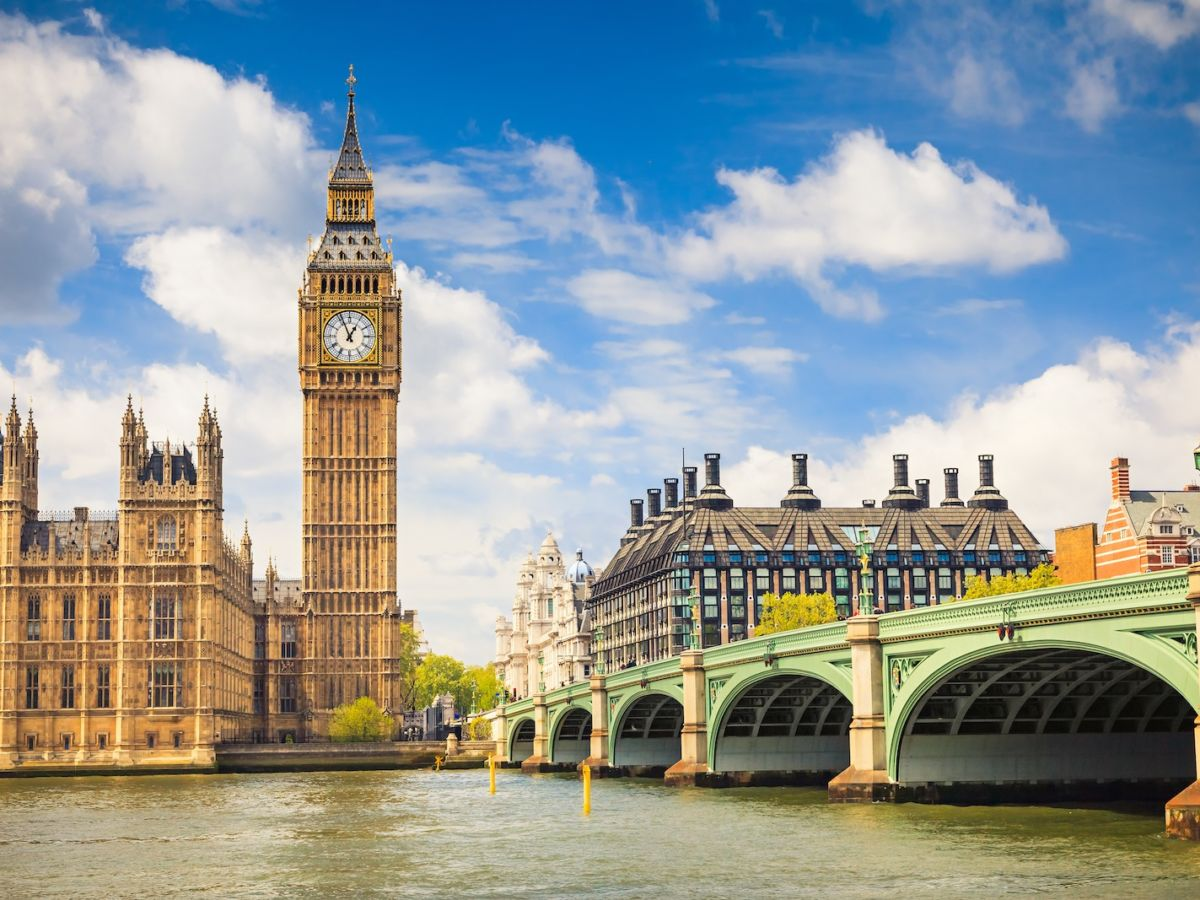

In [1]:
from IPython.display import Image
Image(r"C:\Users\giuse\Desktop\Github\Coursera_capstone\London_project\London.jpg")

----------------------------

# 1. Introduction

-----------------------------------------------

Worldwide, experts estimate that people drink about 2.5 billion cups of coffee a day. Sales in the ready-to-drink market—which includes coffee shops—are forecast to grow by 67 percent between now and 2022. Additionally, coffee and other ready-to-drink shops show incredible resilience in volatile markets, helping to eliminate some of the uncertainty associated with small business ownership. Of course, as with any business decision, opening a new coffee shop requires serious consideration and is a lot more complicated than it seems. Particularly, the location of the shopping mall is one of the most important decisions that will determine whether the mall will be a success or a failure. Effective restaurant spaces are highly sought after and difficult to find. It may take a while to find just the right spot, but for a business type that benefits from ease of access and casual traffic, it’s worth taking time to find the right spot. The perfect location should fit the following parameters:

•	Centrally located and easy to access<br>
<br>
•	Highly visible and experiences consistent foot traffic

## - Business Problem

The objective of this capstone project is to analyse and select the best locations in London to open a new shopping mall. Using data science methodology, Foursquare location data and machine learning techniques like clustering, this project aims to provide solutions to answer the business question: If a property developer is looking to open a new coffee shop in London, where would you recommend that they open it? 

## - Target Audience of this project 

This project is particularly useful to property developers and investors looking to open or invest in new coffee shop in London. Our target audience will fall into B2B brand - will be more focused on logical rather than emotional aspects of decision making. Although we can expect majority of our Audience to be London residents – focusing only on such a circle might be to narrow as there are many developers and investors from not only outside of London, but also foreign – who might be interested in our findings. However, I believe it is fair to say that our Target Audience will be English speaker at least to some extent.

-------------------------------

# 2. Data description

---------------------------------

The Data Set for this project was downloaded from https://www.doogal.co.uk/london_postcodes.php Since the Data Set is very large (142 MB), it was to big to share on git hub, however you can dowload this data directly from the link above. 

The Data Set contains a large amount of data that was not needed for this project, therefore the selection of relevant data was chosen:
<br>
* List of Postcodes that are currently in use in London
<br>
* List of London's District together with their geo location (Lattitude and Longitude)
<br>
* List of Average Income per District (only for extra information about potential customers)<br>
<br>
Using Foursquare API, enabled additional data:<br>
<br>
* London Venues 
<br>
* London most common venues

In [ ]:
from IPython.display import Image
Image(r"C:\Users\giuse\Desktop\Github\Coursera_capstone\London_project\London.jpg")

### Preparing data for clustering (hot encoding dummies)

In [23]:
# one hot encoding
df1h = pd.get_dummies(dfv[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df1h['District'] = dfv['District'] 

# move neighborhood column to the first column
fixed_columns = [df1h.columns[-1]] + list(df1h.columns[:-1])
df1h = df1h[fixed_columns]

#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
dfg = df1h.groupby('District').mean().reset_index()
dfg.head()

,District,Afghan Restaurant,Art Gallery,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Boat or Ferry,...,Tennis Stadium,Theater,Thrift / Vintage Store,Train Station,Tram Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.000,0.0,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.000,0.0,0.000000,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
3,Brent,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bromley,0.0,0.0,0.125,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['District'] = dfg['District']

for ind in np.arange(dfg.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(dfg.iloc[ind, :], num_top_venues)

venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,Construction & Landscaping,Home Service,Park,Fish & Chips Shop,Department Store
1,Barnet,Bus Stop,Grocery Store,Golf Course,Gym / Fitness Center,Bakery
2,Bexley,Pub,Mexican Restaurant,Bar,Indian Restaurant,Supermarket
3,Brent,Scandinavian Restaurant,Portuguese Restaurant,Furniture / Home Store,Supermarket,Fast Food Restaurant
4,Bromley,Indian Restaurant,Grocery Store,Athletics & Sports,Pub,Sandwich Place


In [26]:
coffee = dfg[["District","Coffee Shop","Café"]]
coffee['Coffee Shop or Café'] = coffee['Coffee Shop']+coffee['Café']
coffee = coffee[["District","Coffee Shop or Café"]]
coffee.head()

,District,Coffee Shop or Café
0,Barking and Dagenham,0.0
1,Barnet,0.0
2,Bexley,0.0
3,Brent,0.0
4,Bromley,0.0


### Kmeans clustering algorithm

In [27]:
# set number of clusters
kclusters = 5

dfc = dfg.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(dfc)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 2, 0, 2, 2, 2, 0, 4, 0, 0, 2, 2, 3, 2, 1, 3, 2, 3, 2, 0, 2,
       3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 0])

### Merging all relevant data frames

In [28]:
dft = coffee.copy()

# add clustering labels
dft["Cluster Labels"] = kmeans.labels_
dft = dft.join(df2.set_index("District"), on="District")
dft = dft.join(venues_sorted.set_index("District"), on="District")
dft.head()

,District,Coffee Shop or Café,Cluster Labels,Latitude,Longitude,Average Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,0.0,1,51.546827,0.126591,42582.438859,Construction & Landscaping,Home Service,Park,Fish & Chips Shop,Department Store
1,Barnet,0.0,0,51.608707,-0.206194,55231.812035,Bus Stop,Grocery Store,Golf Course,Gym / Fitness Center,Bakery
2,Bexley,0.0,2,51.459986,0.135816,50794.933820,Pub,Mexican Restaurant,Bar,Indian Restaurant,Supermarket
3,Brent,0.0,0,51.555327,-0.259459,48964.927184,Scandinavian Restaurant,Portuguese Restaurant,Furniture / Home Store,Supermarket,Fast Food Restaurant
4,Bromley,0.0,2,51.391481,0.030264,57427.900552,Indian Restaurant,Grocery Store,Athletics & Sports,Pub,Sandwich Place


### Clusters' visualisation

In [29]:
# create map
map_clusters = folium.Map(location=[51.513377, -0.088532], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dft['Latitude'], dft['Longitude'], dft['District'], dft['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

-----------------------

# 4. Results

----------------------------------

##### Cluster 1 (red)

In [30]:
cluster1=dft.loc[dft['Cluster Labels']==0]
print(cluster1['Average Income'].mean())
cluster1

54108.01449429217


,District,Coffee Shop or Café,Cluster Labels,Latitude,Longitude,Average Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Barnet,0.0,0,51.608707,-0.206194,55231.812035,Bus Stop,Grocery Store,Golf Course,Gym / Fitness Center,Bakery
3,Brent,0.0,0,51.555327,-0.259459,48964.927184,Scandinavian Restaurant,Portuguese Restaurant,Furniture / Home Store,Supermarket,Fast Food Restaurant
7,Croydon,0.0,0,51.368935,-0.090930,53931.100547,Hotel,Gym / Fitness Center,Park,Hotel Bar,Indian Restaurant
9,Enfield,0.0,0,51.641416,-0.080377,48748.581958,Gym,Grocery Store,Hotel,Garden,Electronics Store
10,Greenwich,0.0,0,51.476138,0.051433,51683.671037,Bus Stop,Stationery Store,Soccer Field,Yoga Studio,Deli / Bodega
20,Kingston upon Thames,0.0,0,51.397179,-0.287519,60990.488432,Platform,Chinese Restaurant,Convenience Store,Deli / Bodega,Department Store
32,Westminster,0.0,0,51.513429,-0.151615,59205.520266,Juice Bar,French Restaurant,Hotel Bar,Clothing Store,Food Court


As we can see from above data frame cluster 1 consist of London Areas which is lacking Coffee shops, despite having large amount of active venues like bus stops, stores, hotels and restaurants. Specifically Westminster is centrally located and seem like perfect location to open a new coffee shop.

##### Cluster 2 (purple)

In [31]:
cluster2=dft.loc[dft['Cluster Labels']==1]
print(cluster2['Average Income'].mean())
cluster2

45270.73823242102


,District,Coffee Shop or Café,Cluster Labels,Latitude,Longitude,Average Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,0.0,1,51.546827,0.126591,42582.438859,Construction & Landscaping,Home Service,Park,Fish & Chips Shop,Department Store
15,Havering,0.0,1,51.572526,0.206084,47959.037606,Home Service,Park,Yoga Studio,Fish & Chips Shop,Department Store


Although cluster 2 is also lacking coffee shops, this seem like areas with much lesser foot traffic.

##### Cluster 3 (blue)

In [32]:
cluster3=dft.loc[dft['Cluster Labels']==2]
print(cluster3['Average Income'].mean())
cluster3

55004.77851256537


,District,Coffee Shop or Café,Cluster Labels,Latitude,Longitude,Average Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Bexley,0.000000,2,51.459986,0.135816,50794.933820,Pub,Mexican Restaurant,Bar,Indian Restaurant,Supermarket
4,Bromley,0.000000,2,51.391481,0.030264,57427.900552,Indian Restaurant,Grocery Store,Athletics & Sports,Pub,Sandwich Place
5,Camden,0.200000,2,51.536435,-0.146009,50663.886163,Coffee Shop,Yoga Studio,Fruit & Vegetable Store,Fish & Chips Shop,Falafel Restaurant
6,City of London,0.200000,2,51.514618,-0.092217,65400.000000,Coffee Shop,Steakhouse,Lounge,Grocery Store,Hotel
11,Hackney,0.200000,2,51.548991,-0.069469,50308.106297,Coffee Shop,Grocery Store,Music Venue,Bakery,Garden
12,Hammersmith and Fulham,0.000000,2,51.489911,-0.216125,55755.763411,Pub,Grocery Store,Hotel,Pizza Place,Turkish Restaurant
14,Harrow,0.000000,2,51.592601,-0.339095,57524.288618,Afghan Restaurant,Sandwich Place,Indian Restaurant,Grocery Store,BBQ Joint
17,Hounslow,0.100000,2,51.470820,-0.350779,54277.594628,Indian Restaurant,Dessert Shop,Grocery Store,Portuguese Restaurant,Café
19,Kensington and Chelsea,0.000000,2,51.499363,-0.188642,59420.202252,Indian Restaurant,Grocery Store,Hotel,Pub,Recording Studio
21,Lambeth,0.100000,2,51.458163,-0.119614,54935.060280,Pub,Pizza Place,Nightclub,BBQ Joint,History Museum


Cluster 3 consists of areas that has a consistent foot traffic, but many of those places have already coffee shops which could lead to competition problem. There are some areas however which still seem to lack coffee shops which makes perfect oportunity to open one. Those Areas are: Hammersmith and Fulham and Kensington and Chelsea  

##### Cluster 4 (green)

In [33]:
cluster4=dft.loc[dft['Cluster Labels']==3]
print(cluster4['Average Income'].mean())
cluster4

56094.4109990181


,District,Coffee Shop or Café,Cluster Labels,Latitude,Longitude,Average Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,Haringey,0.1,3,51.589854,-0.104394,51188.404133,Italian Restaurant,Discount Store,Polish Restaurant,Hookah Bar,Mediterranean Restaurant
16,Hillingdon,0.0,3,51.543935,-0.436020,53997.963838,Construction & Landscaping,Playground,Scenic Lookout,Convenience Store,Deli / Bodega
18,Islington,0.0,3,51.541640,-0.108322,54640.349791,Pub,Park,Cocktail Bar,Theater,Ice Cream Shop
22,Lewisham,0.0,3,51.451639,-0.023838,52647.783849,Park,Athletics & Sports,Tree,Bakery,Music Store
23,Merton,0.0,3,51.410641,-0.193465,60833.598464,Tram Station,Pub,Park,Yoga Studio,Fast Food Restaurant
26,Richmond upon Thames,0.1,3,51.448435,-0.317004,65883.322003,Historic Site,Park,Art Gallery,Playground,Gastropub
27,Southwark,0.2,3,51.483549,-0.077638,53469.454914,Café,Bus Stop,Fast Food Restaurant,Lake,Park


Cluster 4 as well as cluster 5 are not recommended locations due to either having competition already established or not consistent foot traffic.

##### Cluster 5  (yellow)

In [34]:
cluster5=dft.loc[dft['Cluster Labels']==4]
print(cluster5['Average Income'].mean())
cluster5

53382.734484367706


,District,Coffee Shop or Café,Cluster Labels,Latitude,Longitude,Average Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Ealing,0.0,4,51.518978,-0.32475,53382.734484,Train Station,Gastropub,Yoga Studio,Fish & Chips Shop,Deli / Bodega


--------------------

# 5. Recommendation visualised

---------------------------

In [35]:
rec=df[(dft.District=='Hammersmith and Fulham')|(dft.District=='Kensington and Chelsea')|(dft.District=='Westminster')]
rec

,District,Latitude,Longitude,Average Income
12,Hammersmith and Fulham,51.489911,-0.216125,55755.763411
19,Kensington and Chelsea,51.499363,-0.188642,59420.202252
32,Westminster,51.513429,-0.151615,59205.520266


In [36]:
Area2 = folium.Map(location=[51.513377, -0.088532], zoom_start=11)

# add all markers to map
for lat, lng, District in zip(rec['Latitude'], rec['Longitude'], rec['District']):
    label = '{}'.format(District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Area2) 
 
Area2

----------------------------

# 6. Conclusion

---------------------------

Most of the coffee shops are concentrated in the central area of London in cluster 3 - opening a coffee shop in that cluster is likely to be suffering from intense competition due to oversupply and high concentration of coffee shops. On the other hand, this is the area where the coffee shops are thriving due to all other factors (customers are drawn to variety of venues and the central location draws in substantial customer volume).  There are still Districts in cluster 3, that are lacking coffee shops - those are: Bexley, Bromley, Hammersmith and Fulham, Harrow, 'Kensington and Chelsea' and Redbridge. However Bexley, Bromley, Harrow and Redbridge are not as central as 'Hammersmith and Fulham' as well as 'Kensington and Chelsea' which makes those two districts prime recommendation.
Cluster 1 also seem to have very good  opportunities for opening the business in question, as it has a lot of "active" venues like bus stops, restaurants and shops but is clearly lacking coffee shops. Especially Westmister which is located in Central London. There are also opportunities in cluster 2, however this area is quieter than cluster 1 and therefore we could expect many less customers. 

# Reccomended areas: 
    
    * Westminster
    * Hammersmith and Fulham
    * Kensington and Chelsea    
    